# Louisville Crime Data

## Import Packages

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read and create a dataframe

In [60]:

df_2024 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2024.csv')

## Understanding and cleaning the data

From the review below the data appears to be clean and ready for basic EDA with 0 duplicate values and no columns that need removal or combination. The total rows are +70K across 16 columns. Some considerations and notes for enhancement in the future are below:

The data types are mostly objects. I believe I need to change some columns to integers such as zip_code or badge_id to be workable, but then again these aren't performance numbers for mathmatecial calculation.

I could separate the date_reported / date_occurred into new columns where the month and year are separated out so that it's easier to build charts and tables for those dimensions.

I also need to combine all downladed data into one file so that I can see more valuable trends over time. 

In [61]:
df_2024.head()

,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,ObjectId
0,LMPD25144947,12/5/2025 5:28:00 PM,11/16/2024 5:00:00 AM,8701.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,4TH DIVISION,424,RESIDENCE/HOME,500 BLOCK LONGFIELD AVE,LOUISVILLE,40215,1
1,LMPD25140113,11/24/2025 4:22:00 AM,7/9/2024 4:00:00 AM,8631.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,8TH DIVISION,824,RESIDENCE/HOME,100 BLOCK LA FONTENAY DR,DOUGLASS HILLS,40223,2
2,LMPD25139843,11/23/2025 2:37:00 PM,11/15/2024 9:00:00 PM,8560.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,YES,2ND DIVISION,223,HIGHWAY/ ROAD/ ALLEY/ STREET/ SIDEWALK,1300 BLOCK S 26TH ST,LOUISVILLE,40210,3
3,LMPD25138669,11/20/2025 8:54:00 PM,1/1/2024 5:01:00 AM,8646.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,1ST DIVISION,111,RESIDENCE/HOME,2400 BLOCK NORTHWESTERN PKWY,LOUISVILLE,40212,4
4,LMPD25138625,11/20/2025 7:29:00 PM,10/29/2024 4:00:00 PM,8544.0,23 THEFT OTHER,"THEFT BY DECEPTION INCLUDING COLD CHECKS $1,00...",23H,A,YES,3RD DIVISION,323,RESIDENCE/HOME,200 BLOCK ANGELETTA WAY,LOUISVILLE,40214,5


In [62]:
df_2024.info

<bound method DataFrame.info of       incident_number           date_reported          date_occurred  \
0        LMPD25144947    12/5/2025 5:28:00 PM  11/16/2024 5:00:00 AM   
1        LMPD25140113   11/24/2025 4:22:00 AM    7/9/2024 4:00:00 AM   
2        LMPD25139843   11/23/2025 2:37:00 PM  11/15/2024 9:00:00 PM   
3        LMPD25138669   11/20/2025 8:54:00 PM    1/1/2024 5:01:00 AM   
4        LMPD25138625   11/20/2025 7:29:00 PM  10/29/2024 4:00:00 PM   
...               ...                     ...                    ...   
70763    LMPD23107772    11/5/2023 7:35:00 PM  3/30/2024 12:00:00 AM   
70764    LMPD23106029   11/1/2023 12:27:00 PM  1/10/2024 10:15:00 PM   
70765    LMPD23120768    11/1/2023 4:00:00 AM   2/15/2024 6:04:00 PM   
70766    LMPD23104184   10/27/2023 1:57:00 PM  1/10/2024 10:40:00 PM   
70767    LMPD23104309  10/26/2023 10:00:00 PM   4/11/2024 2:49:00 PM   

       badge_id  offense_classification  \
0        8701.0  29 FRAUD IMPERSONATION   
1        8631.0  

In [63]:
df_2024.shape

(70768, 16)

In [64]:
df_2024.dtypes

incident_number            object
date_reported              object
date_occurred              object
badge_id                  float64
offense_classification     object
offense_code_name          object
nibrs_code                 object
nibrs_group_name           object
was_offense_completed      object
lmpd_division              object
lmpd_beat                  object
location_category          object
block_address              object
city                       object
zip_code                   object
ObjectId                    int64
dtype: object

### Duplicate values?

In [65]:
df_2024.duplicated().sum()

0

In [66]:
df_2024[df_2024.duplicated(keep=False)]

,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,ObjectId


### Combine all datasets into one file

### Separate out data_occurred and date_reported into unique month / year columns

## EDA work

As I have begun exploring and visualizing, the category of 'all other offenses' is the highest offense_category indicating that there is a lot of unknown crime or research that needs to occur on what is defined within that group. Is it parking tickets?

- Q: Do we see a trend in badge_id by offense? Are there specific badge_id that tend to report certain offenses? Does it correlate to zip code?
- Q: Have certain offenses increased or declines since 2003?
- Q: What crime policies or events have caused offenses to shift over the years?

In [67]:
df_2024['offense_classification'].value_counts()


56 ALL OTHER OFFENSES        8229
11 SIMPLE ASSAULT            7266
24 VANDALISM                 6623
14 AUTO THEFT                5789
12 INTIMIDATION              4946
23 THEFT OTHER               4818
21 THEFT FR VEH              4027
13 BURGLARY                  3556
9 AGGRAVATED ASSAULT         3506
18 SHOPLIFTING               3220
34 NARCOTICS                 2784
23 LARCENY                   1973
46 FAMILY OFFENSES           1419
19 THEFT FR BLDG             1404
22 THEFT MV PARTS            1230
28 FRAUD CREDIT CARD/ATM     1090
33 STOLEN PROPERTY            976
8 ROBBERY                     973
35 NARCOTICS EQUIP            926
46 WPNS LAW VIOLATION         919
29 FRAUD IMPERSONATION        764
26 COUNTERFEITING             670
55 TRESPASSING                590
27 FRAUD                      449
99 NON-REPORTABLE             279
4 FORCIBLE RAPE               237
32 EMBEZZLEMENT               209
10 KIDNAPPING ONLY            201
7 FORCIBLE FONDLING           196
15 UNAUTHORIZE

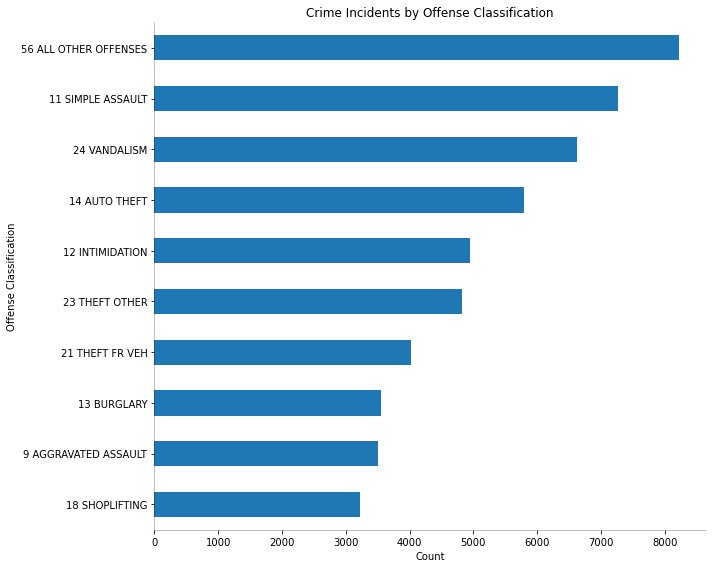

In [68]:
plt.figure(figsize=(10, 8))
df_2024['offense_classification'].value_counts().head(10)[::-1].plot(kind='barh')

plt.xlabel("Count")
plt.ylabel("Offense Classification")
plt.title("Crime Incidents by Offense Classification")

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

